In [1]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

## Import training data for K-fold CV

In [2]:
X_train = pd.read_csv("X_exp_1_train.csv", sep = ",")

y_train = pd.read_csv("y_exp_1_train.csv", sep = ",")


### First classification: True Second Price Auction or Not

In [3]:
X, y = np.array(X_train.drop(columns = ['Unnamed: 0'])), np.array(y_train['second_price_1'])

In [4]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)

#collect scores
knn_1_scores = []
logistic_1_scores = []
svm_1_scores = []
dt_1_scores = []
rf_1_scores = []
xg_1_scores = []

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    
    #k nearest neighbors
    knn_1 = KNeighborsClassifier(n_neighbors=5)
    knn_1.fit(X_train, y_train)
    y_pred = knn_1.predict(X_val)
    knn_1_scores.append(metrics.accuracy_score(y_val, y_pred))

    #logistic regression
    logit = LogisticRegression(C = 0.95)
    logit.fit(X_train, y_train)
    y_pred = logit.predict(X_val)
    #check this code
    logistic_1_scores.append(metrics.accuracy_score(y_val, y_pred))
    
    #support vector machines
    svm_model_1 = svm.SVC(kernel="linear")
    svm_model_1.fit(X_train, y_train)
    y_pred = svm_model_1.predict(X_val)
    svm_1_scores.append(metrics.accuracy_score(y_val, y_pred))
    
    #decision tree
    dt_model_1 = DecisionTreeRegressor()
    dt_model_1.fit(X_train, y_train)
    y_pred = dt_model_1.predict(X_val)
    dt_1_scores.append(metrics.accuracy_score(y_val, y_pred))
    
    #random forests
    rf_model_1 = RandomForestClassifier(n_estimators=20, max_depth=2, random_state=0)
    rf_model_1.fit(X_train, y_train)
    y_pred = rf_model_1.predict(X_val)
    rf_1_scores.append(metrics.accuracy_score(y_val, y_pred))
    
    #xg boost
    xg_model_1 = xgb.XGBClassifier()
    xg_model_1.fit(X_train,y_train)
    y_pred = xg_model_1.predict(X_val)
    xg_1_scores.append(metrics.accuracy_score(y_val, y_pred))

model_scores = [knn_1_scores, logistic_1_scores, svm_1_scores, dt_1_scores, rf_1_scores, xg_1_scores]  
columns = ['knn', "logistic", "svm", "dt", "rf", "xgboost"]
df_1 = pd.DataFrame()
for i in range(0,6):
    df_1[columns[i]] = model_scores[i]

#print mean accuracy scores for kfold
df_1.mean(axis=0)
    
    
    
    






/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

knn         0.965286
logistic    0.976467
svm         0.988851
dt          0.998765
rf          0.995054
xgboost     0.998765
dtype: float64

#### K-Fold Results

In [5]:
df_1

,knn,logistic,svm,dt,rf,xgboost
0,0.944444,0.944444,0.975309,0.993827,0.981481,0.993827
1,0.981366,0.993789,0.987578,1.000000,1.000000,1.000000
2,0.981366,0.993789,1.000000,1.000000,1.000000,1.000000
3,0.962733,0.987578,1.000000,1.000000,1.000000,1.000000
4,0.956522,0.962733,0.981366,1.000000,0.993789,1.000000


In [6]:
rf_model_1.feature_importances_

array([0.02827136, 0.1769626 , 0.25375816, 0.02870366, 0.02526075,
       0.00544592, 0.134875  , 0.11347119, 0.06443653, 0.        ,
       0.        , 0.11729947, 0.02872446, 0.0218369 , 0.        ,
       0.00095399, 0.        ])

In [7]:
x_df = pd.read_csv("X_exp_1_train.csv", sep = ",")
x_df.columns

Index(['Unnamed: 0', '25_per_1', '50_per_1', '75_per_1', 'max_per_1', 'skew_1',
       'kurtosis_1', '4th_1', '5th_1', 'std/mean_1', 'skew_2', 'kurtosis_2',
       '4th_2', '5th_2', 'std/mean_2', 'total return ratio', 'ratio stdev',
       'max ratio'],
      dtype='object')

### Second Classification:  Auction Rule

#### Now auctions are classified by type: Second Price, Constant Percent, Variable Percent, Soft Floor, and Mixed Strategy

In [8]:
X_train = pd.read_csv("X_exp_1_train.csv", sep = ",")

y_train = pd.read_csv("y_exp_1_train.csv", sep = ",")



In [9]:
X, y = np.array(X_train.drop(columns = ['Unnamed: 0'])), np.array(y_train['auction type'])

In [10]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)

#collect scores
knn_2_scores = []
logistic_2_scores = []
svm_2_scores = []
dt_2_scores = []
rf_2_scores = []
xg_2_scores = []

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    
    #k nearest neighbors
    knn_2 = KNeighborsClassifier(n_neighbors=5)
    knn_2.fit(X_train, y_train)
    y_pred = knn_2.predict(X_val)
    knn_2_scores.append(metrics.accuracy_score(y_val, y_pred))
    
    #logistic regression
    logit_2 = LogisticRegression(C = 0.95)
    logit_2.fit(X_train, y_train)
    y_pred = logit_2.predict(X_val)
    #check this code
    logistic_2_scores.append(metrics.accuracy_score(y_val, y_pred))
    
    #support vector machines
    svm_model_2 = svm.SVC(kernel="linear")
    svm_model_2.fit(X_train, y_train)
    y_pred = svm_model_2.predict(X_val)
    svm_2_scores.append(metrics.accuracy_score(y_val, y_pred))
    
    #decision tree
    dt_model_2 = DecisionTreeRegressor()
    dt_model_2.fit(X_train, y_train)
    y_pred = dt_model_2.predict(X_val)
    dt_2_scores.append(metrics.accuracy_score(y_val, y_pred))
    
    #random forests
    rf_model_2 = RandomForestClassifier(n_estimators=20, max_depth=2, random_state=0)
    rf_model_2.fit(X_train, y_train)
    y_pred = rf_model_2.predict(X_val)
    rf_2_scores.append(metrics.accuracy_score(y_val, y_pred))
    
    #xg boost
    xg_model_2 = xgb.XGBClassifier()
    xg_model_2.fit(X_train,y_train)
    y_pred = xg_model_2.predict(X_val)
    xg_2_scores.append(metrics.accuracy_score(y_val, y_pred))

model_scores = [knn_2_scores, logistic_2_scores, svm_2_scores, dt_2_scores, rf_2_scores, xg_2_scores]  
columns = ['knn', "logit", "svm", "dt", "rf", "xgboost"]
df_2 = pd.DataFrame()
for i in range(0,6):
    df_2[columns[i]] = model_scores[i]
df_2.mean(axis=0)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

knn        0.941692
logit      0.952872
svm        0.972709
dt         0.990085
rf         0.977686
xgboost    0.990085
dtype: float64

### K-Fold results

In [11]:
df_2

,knn,logit,svm,dt,rf,xgboost
0,0.938272,0.938272,0.969136,0.981481,0.962963,0.981481
1,0.944099,0.962733,0.968944,0.987578,0.956522,0.987578
2,0.975155,0.993789,0.993789,1.000000,0.993789,1.000000
3,0.937888,0.950311,0.975155,0.993789,0.993789,0.993789
4,0.913043,0.919255,0.956522,0.987578,0.981366,0.987578


In [12]:
rf_model_2.feature_importances_

array([0.0488379 , 0.15043176, 0.2011487 , 0.03667515, 0.06195042,
       0.04155765, 0.14595655, 0.10246127, 0.09308649, 0.01086983,
       0.03649325, 0.04162732, 0.01448488, 0.        , 0.        ,
       0.01441883, 0.        ])

In [13]:
x_df = pd.read_csv("X_exp_1_train.csv", sep = ",")
x_df.columns

Index(['Unnamed: 0', '25_per_1', '50_per_1', '75_per_1', 'max_per_1', 'skew_1',
       'kurtosis_1', '4th_1', '5th_1', 'std/mean_1', 'skew_2', 'kurtosis_2',
       '4th_2', '5th_2', 'std/mean_2', 'total return ratio', 'ratio stdev',
       'max ratio'],
      dtype='object')

In [14]:
X_1_test = pd.read_csv("X_exp_1_test.csv", sep = ",")
y_test = pd.read_csv("y_exp_1_test.csv", sep = ",")
y_1_test = y_test["second_price_1"]

X, y = np.array(X_1_test.drop(columns = ['Unnamed: 0'])), np.array(y_1_test)

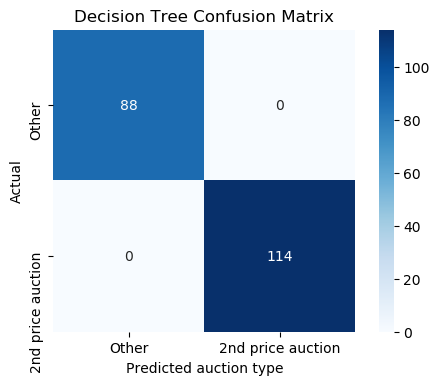

In [15]:
dt_1_confusion = confusion_matrix(y, dt_model_1.predict(X))
plt.figure(dpi=100)
sns.heatmap(dt_1_confusion, cmap=plt.cm.Blues, annot=True, fmt='g',square=True,
           xticklabels=['Other', '2nd price auction' ],
           yticklabels=['Other', '2nd price auction'])

plt.xlabel('Predicted auction type')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix');

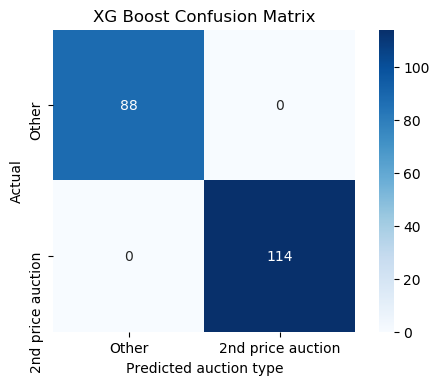

In [16]:
xg_1_confusion = confusion_matrix(y, xg_model_1.predict(X))
plt.figure(dpi=100)
sns.heatmap(xg_1_confusion, cmap=plt.cm.Blues, annot=True, fmt='g', square=True,
           xticklabels=['Other', '2nd price auction' ],
           yticklabels=['Other', '2nd price auction'])

plt.xlabel('Predicted auction type')
plt.ylabel('Actual')
plt.title('XG Boost Confusion Matrix');

In [17]:
X_2_test = pd.read_csv("X_exp_1_test.csv", sep = ",")
y_test = pd.read_csv("y_exp_1_test.csv", sep = ",")
y_2_test = y_test["auction type"]

X, y = np.array(X_2_test.drop(columns = ['Unnamed: 0'])), np.array(y_2_test)

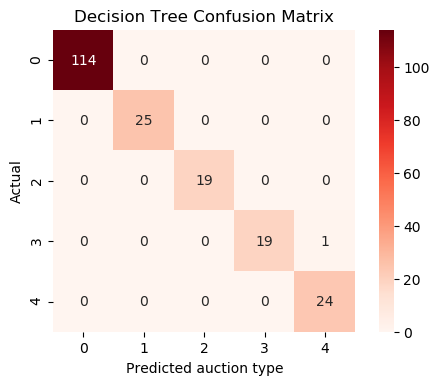

In [18]:
dt_2_confusion = confusion_matrix(y, dt_model_2.predict(X), labels  = [0, 1, 2, 3, 4])
plt.figure(dpi=100)
sns.heatmap(dt_2_confusion, cmap=plt.cm.Reds, annot=True, fmt='g', square=True,
           xticklabels=["0", "1", "2", "3", "4"],
           yticklabels=["0", "1", "2", "3", "4"])

plt.xlabel('Predicted auction type')
plt.ylabel('Actual')

plt.title('Decision Tree Confusion Matrix');


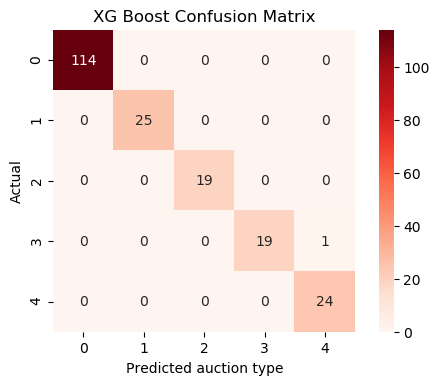

In [19]:
xg_2_confusion = confusion_matrix(y, xg_model_2.predict(X), labels  = [0, 1, 2, 3, 4])
plt.figure(dpi=100)
sns.heatmap(xg_2_confusion, cmap=plt.cm.Reds, annot=True, fmt='g', square=True,
           xticklabels=['0', '1', '2', '3', '4'],
           yticklabels=['0', '1', '2', '3', '4'])

plt.xlabel('Predicted auction type')
plt.ylabel('Actual')
plt.title('XG Boost Confusion Matrix');

In [20]:
xg_model_1.feature_importances_

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [21]:
x_df = pd.read_csv("X_exp_1_train.csv", sep = ",")
x_df = x_df.drop(columns = ["Unnamed: 0"])
x_df.columns

Index(['25_per_1', '50_per_1', '75_per_1', 'max_per_1', 'skew_1', 'kurtosis_1',
       '4th_1', '5th_1', 'std/mean_1', 'skew_2', 'kurtosis_2', '4th_2',
       '5th_2', 'std/mean_2', 'total return ratio', 'ratio stdev',
       'max ratio'],
      dtype='object')

In [22]:
xg_model_2.feature_importances_

array([0.19031334, 0.17303659, 0.2605778 , 0.00664481, 0.00591994,
       0.15979181, 0.1533085 , 0.01334191, 0.00057316, 0.0029375 ,
       0.00245742, 0.0047322 , 0.00547454, 0.00218166, 0.00409818,
       0.0091294 , 0.00548134], dtype=float32)